In [5]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [6]:
# Simular beta(2,4) usando a Cauchy
%%R
alfa = 2
beta = 4
d.beta = function(x){(gamma(alfa+beta)*x^(alfa-1)*((1-x)^(beta-1)))/(gamma(alfa)*gamma(beta))}

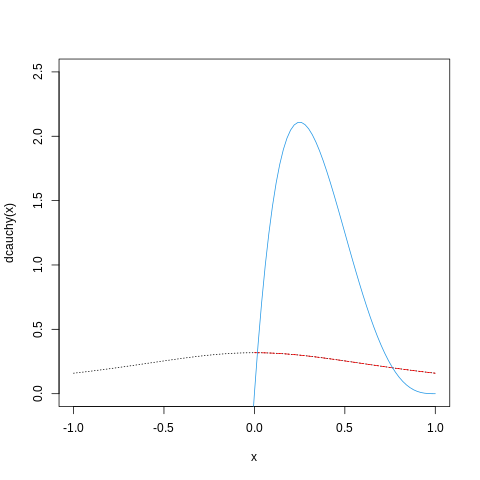

In [7]:
%%R
curve(dcauchy(x),-1,1, lty = 3, ylim = c(0, 2.5))
curve(dcauchy(x),0,1, add = TRUE, lty = 5, col = "red")
curve(d.beta(x), add = TRUE, col = 4)

[1] 0


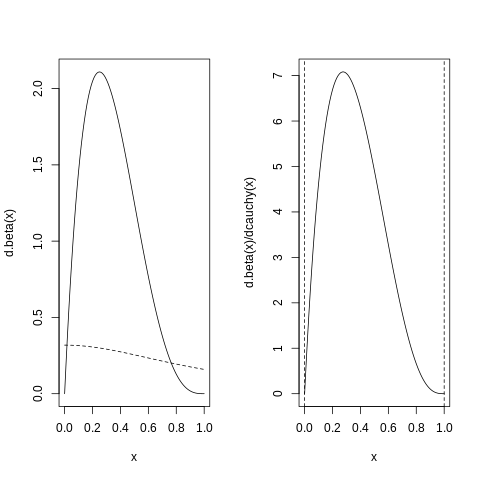

In [8]:
%%R
# Beta e Cauchy.
par(mfrow = c(1, 2))
curve(d.beta(x), 0, 1)
curve(dcauchy(x), add = TRUE, lty = 2)

# Razão entre Beta e Cauchy
curve(d.beta(x)/dcauchy(x), 0, 1)
abline(v = c(0, 1), lty = 2)
layout(1)
d.beta(1)/dcauchy(1)

In [9]:
%%R
M <- 7.1      ## Valor obtido no "olho" com base no gráfico da Razão entre Beta e Cauchy

## Taxa(teorica)de aceitacao:
1/M

[1] 0.1408451


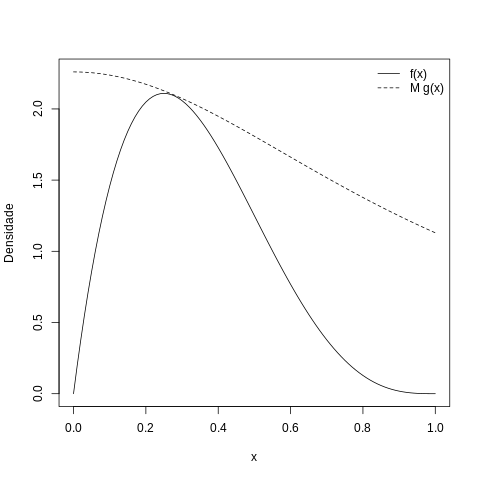

In [10]:
# Visualização das curvas
%%R
curve(M * dcauchy(x), 0, 1,
      lty = 2,
      ylim = c(0, M * dcauchy(0)),
      ylab = "Densidade")
curve(d.beta(x), add = TRUE)
legend("topright",
       legend = c("f(x)", "M g(x)"),
       lty = c(1, 2),
       bty = "n")

In [11]:
%%R
# Aplicação do método

M <- 7.1
f <- function(x) d.beta(x)
g <- function(x) dcauchy(x)

# A inversa da F para a Cauchy é: F^{-1} = tan(pi * (1 - u)). No entanto, será utilizado o gerador rcauchy().

# 1. Gerar y cuja densidade é g, uma Cauchy.
y <- rcauchy(n = 1)
y


# 2. Gerar u de uma uniforme padrão.
u <- runif(n = 1)
u

# 3. Comparar e decidir.
r <- f(y)/(M * g(y))
r

if (u < r) {
  x <- y
  print("u < r, então valor aceito.")
} else {
  print("u >= r, então valor descartado.")
}

[1] "u >= r, então valor descartado."


In [12]:
%%R
# Aplicar dentro de um laço condicional para obter N valores.

n <- 1        # Contador de valores aceitos.
l <- 1        # Contador de ciclos.
N <- 1000000  # Total de número à gerar.

# Vetor vazio.
# x <- vector(mode = "numeric", length = N)
x <- numeric(N)

while (n < N) {
  y <- rcauchy(n = 1)
  u <- runif(n = 1)
  w <- f(y)/(M * g(y))
  if (u < w) {
    x[n] <- y
    n <- n + 1
  }
  l <- l + 1
}

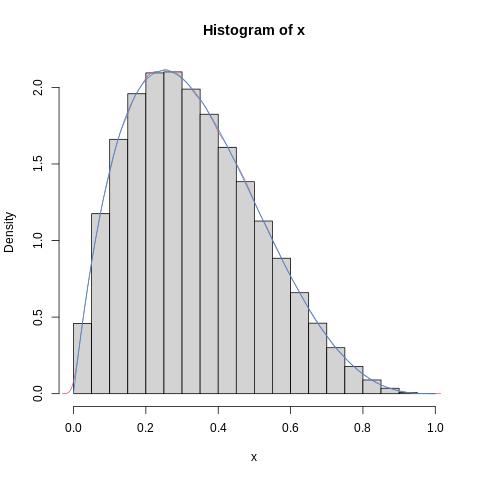

In [13]:
%%R
hist(x, freq = FALSE); lines(density(x), col = 2)
curve(d.beta(x), add = TRUE, from = 0, to = 1, col = 4)

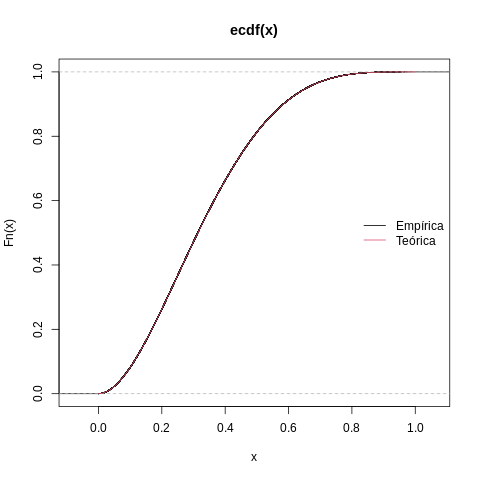

In [14]:
%%R
plot(ecdf(x))
curve(pbeta(x, alfa, beta), add = TRUE, from = 0, to = 1, col = 2)
legend("right", legend = c("Empírica", "Teórica"),
       lty = 1, col = 1:2, bty = "n")